# CUB - Human Study Analysis

In [1]:
DATA_SET = 'CUB'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
import numpy as np

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Reading Data

In [4]:
df = pd.read_csv('../data/CUB-Human-Study-Summary.csv')

In [5]:
df.head(5)

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1,5791dae225cb71000128ad5bNo-XAI,Chuck_Will_Widow_0051_796991.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,022.Chuck_will_Widow,1,0.72,Medium,022.Chuck_will_Widow,105.Whip_poor_Will,105.Whip_poor_Will,105.Whip_poor_Will,0.72,0.0275,0.0225,0.0300
2,5791dae225cb71000128ad5bNo-XAI,Vesper_Sparrow_0065_125446.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,131.Vesper_Sparrow,0,0.63,Medium,115.Brewer_Sparrow,131.Vesper_Sparrow,131.Vesper_Sparrow,131.Vesper_Sparrow,0.63,0.0225,0.0275,0.0300
3,5791dae225cb71000128ad5bNo-XAI,Western_Wood_Pewee_0009_98115.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,102.Western_Wood_Pewee,0,0.78,Hard,039.Least_Flycatcher,102.Western_Wood_Pewee,040.Olive_sided_Flycatcher,102.Western_Wood_Pewee,0.78,0.0300,0.0200,0.0225
4,5791dae225cb71000128ad5bNo-XAI,Warbling_Vireo_0126_158696.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,155.Warbling_Vireo,0,0.97,Hard,153.Philadelphia_Vireo,153.Philadelphia_Vireo,155.Warbling_Vireo,155.Warbling_Vireo,0.97,0.0250,0.0250,0.0250


## Orders for Plotting

In [6]:
ORDER_DICT = {'ResNet-50': 1,
              'kNN': 2,
              'EMD-NN':  3,
              'EMD-Corr': 4,
              'CHM-NN': 5,
              'CHM-Corr': 6}

In [7]:
print(f"total {len(df)} etnries")

total 10860 etnries


In [8]:
(df.groupby(['UID', 'Method'])['Query'].count().groupby('Method').sum()/30).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,Query
4,ResNet-50,61.0
5,kNN,59.0
3,EMD-NN,60.0
2,EMD-Corr,60.0
1,CHM-NN,61.0
0,CHM-Corr,61.0


## Removing Bad Users 

We will remove all users that their average accuracy was  `0.5` or bellow.

In [9]:
print(f"total {len(df)} entries")

total 10860 entries


In [10]:
df = df.drop(df[df.Accuracy <= 0.5].index)

In [11]:
print(f"total {len(df)} entires")

total 10650 entires


In [12]:
df = df.sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

# Basic Analysis

## Human+AI Accuracy

In [13]:
accuracy_df = df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df['mean']*=100
accuracy_df['std']*=100

# Accuracy Reported in the Paper

In [14]:
accuracy_df

,Method,mean,std
4,ResNet-50,65.500000,7.461767
5,kNN,64.745763,7.143933
3,EMD-NN,64.124294,7.066704
2,EMD-Corr,67.643678,7.440698
1,CHM-NN,65.722222,8.143988
0,CHM-Corr,69.717514,9.082174


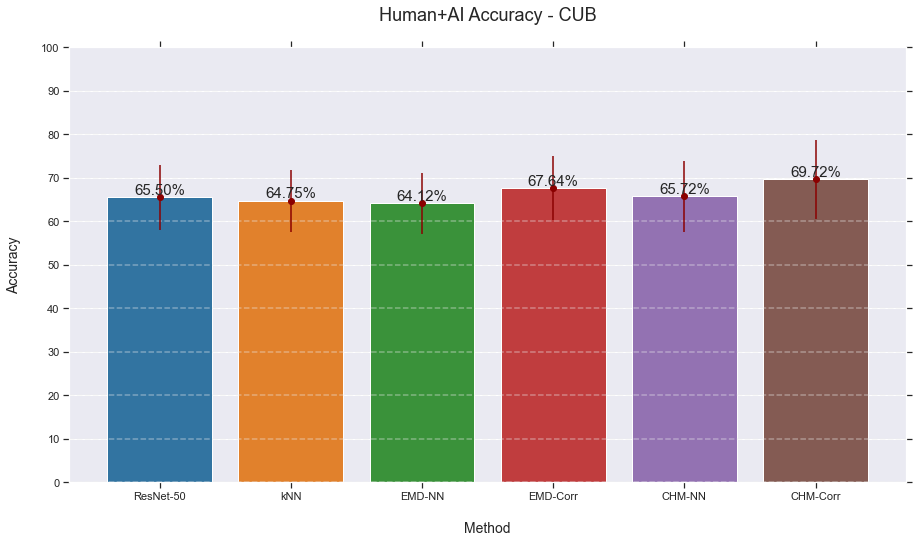

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 8))

sns.barplot(data=accuracy_df, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

plt.ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title(f'Human+AI Accuracy - {DATA_SET}\n', fontsize=18)
plt.errorbar(accuracy_df['Method'], accuracy_df['mean'], yerr=accuracy_df['std'], fmt="o", color="darkred")

fig.savefig(f'../plots/human-study-main-results/CUB-Accuracy.pdf' ,dpi=100, bbox_inches='tight')

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)

plt.show()

## Counter Balance

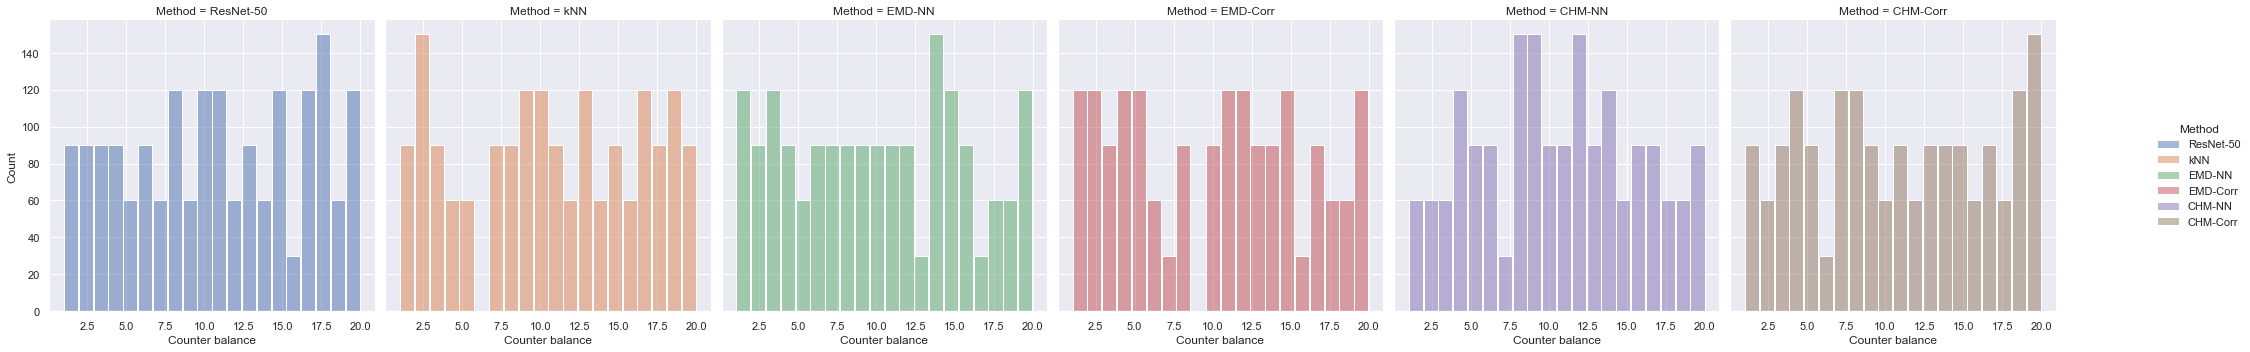

In [16]:
sns.displot(
    df, x="Counter balance", col="Method", bins=20 ,kde=False, common_bins=False,
    height=5, facet_kws=dict(margin_titles=True), hue="Method", shrink=.95
)

plt.show()

## Time to Finish

In [17]:
df.head(2)

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1206,5cb329855ee1730001ae6683No-XAI,American_Redstart_0044_103433.jpg,15,382592.0,381136,2022-05-06 01:09:16.104,1,0.533333,16,ResNet-50,109.American_Redstart,0,0.49,Medium,156.White_eyed_Vireo,152.Blue_headed_Vireo,152.Blue_headed_Vireo,152.Blue_headed_Vireo,0.49,0.0275,0.0225,0.0225


In [18]:
val_time_df = df.groupby(['UID', 'Method'])[['Validation Reaction Time', 'Accuracy']].mean().reset_index()

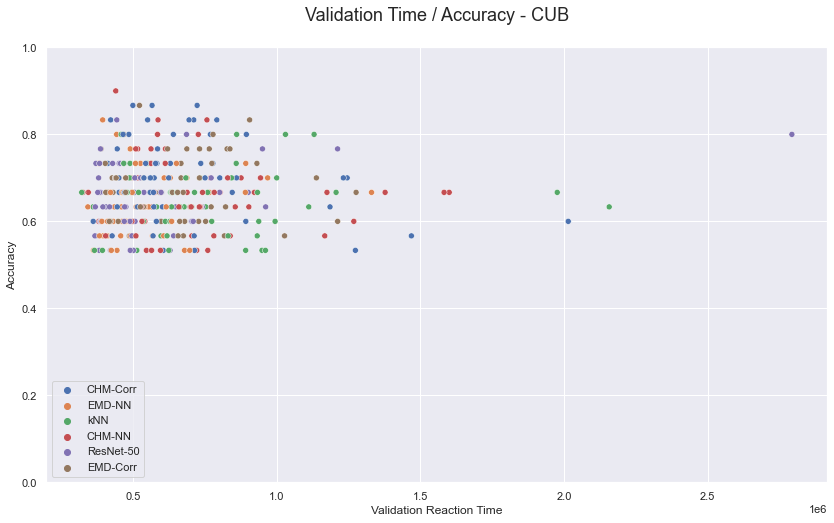

In [19]:
fig, ax = plt.subplots(1, figsize=(14, 8), facecolor=(1,1,1))

g = sns.scatterplot(data=val_time_df, y="Accuracy", x="Validation Reaction Time", hue="Method", ax=ax)

plt.ylim(0, 1)
plt.legend(loc='lower left')
plt.title(f'Validation Time / Accuracy - {DATA_SET}\n', fontsize=18)
plt.show()

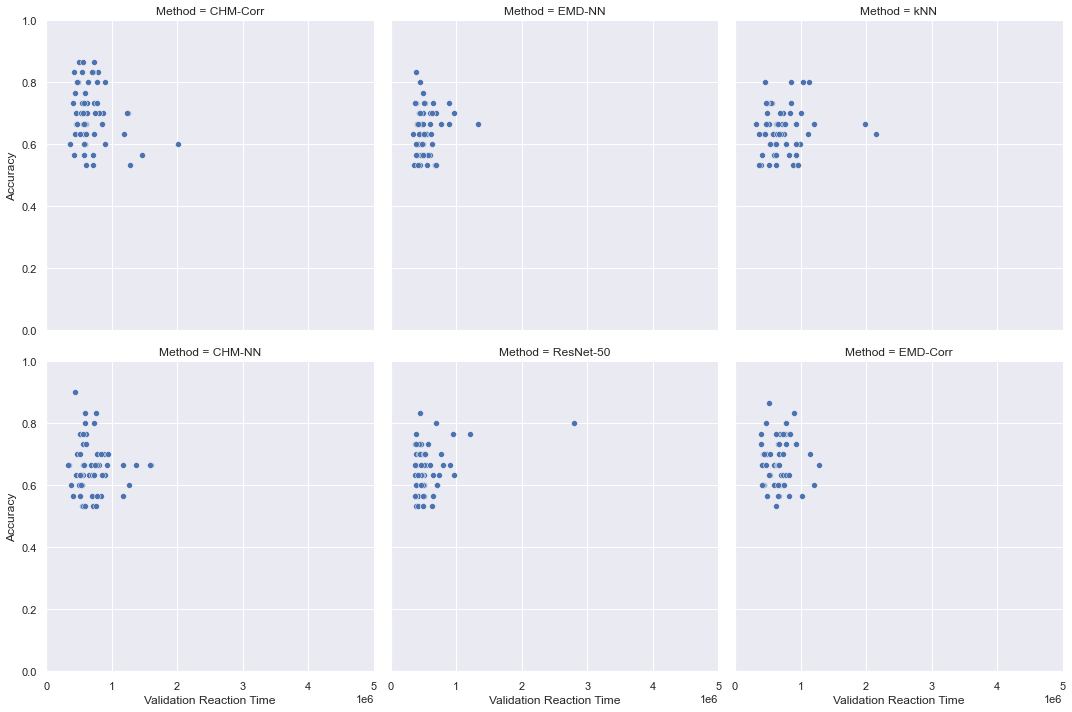

In [20]:
pal = dict(Lunch="seagreen", Dinner=".7")
g = sns.FacetGrid(val_time_df, col="Method", margin_titles=True, palette=pal, col_wrap=3, height=5, ylim=(0, 1), xlim=(0, 5_000_000))
g.map(sns.scatterplot, "Validation Reaction Time", "Accuracy")
plt.show()

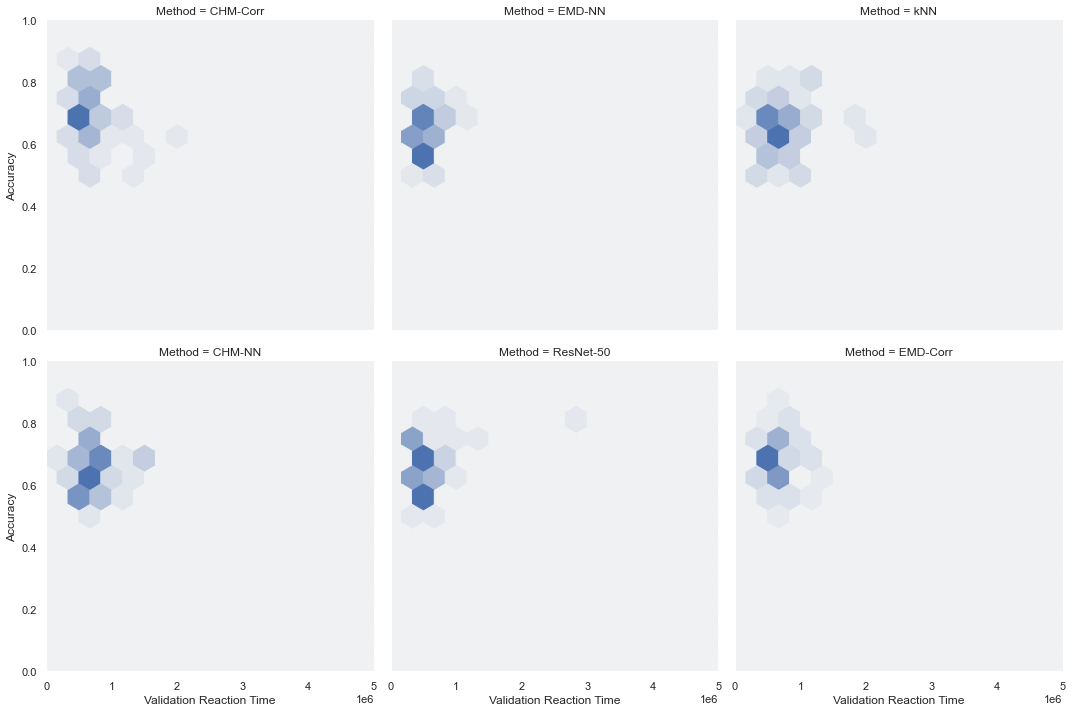

In [21]:
def hexbin(x, y, color, **kwargs):
  cmap = sns.light_palette(color, as_cmap=True)
  plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

pal = dict(Lunch="seagreen", Dinner=".7")
g = sns.FacetGrid(val_time_df, col="Method", margin_titles=True, palette=pal, col_wrap=3, height=5, ylim=(0, 1), xlim=(0, 5_000_000))
g.map(hexbin, "Validation Reaction Time", "Accuracy", extent=[0, 5_000_000, 0, 1]);
plt.show()

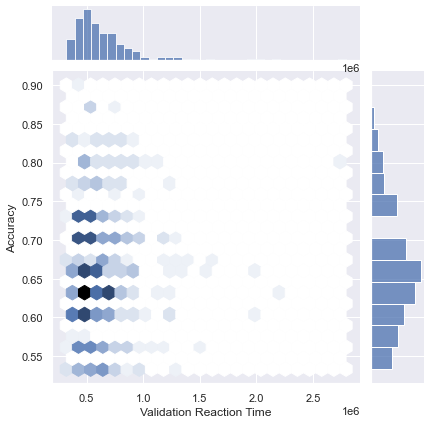

In [22]:
pal = dict(Lunch="seagreen", Dinner=".7")
sns.jointplot(data=val_time_df, x="Validation Reaction Time", y="Accuracy", kind="hex")

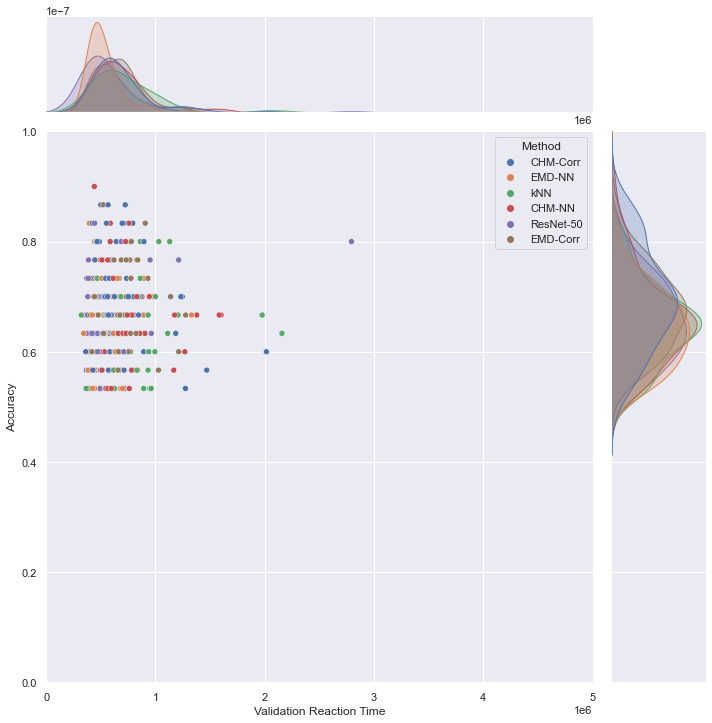

In [23]:
g = sns.jointplot(data=val_time_df, x="Validation Reaction Time", y="Accuracy", hue="Method", height=10, xlim=(0, 5_000_000), ylim=(0,1))

## Time Performance

In [24]:
df.head(2)

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1206,5cb329855ee1730001ae6683No-XAI,American_Redstart_0044_103433.jpg,15,382592.0,381136,2022-05-06 01:09:16.104,1,0.533333,16,ResNet-50,109.American_Redstart,0,0.49,Medium,156.White_eyed_Vireo,152.Blue_headed_Vireo,152.Blue_headed_Vireo,152.Blue_headed_Vireo,0.49,0.0275,0.0225,0.0225


In [25]:
raw_time_df = df.groupby(['Method'])['Test Reaction Time'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [26]:
raw_time_df['mean'] /= 1000.0
raw_time_df['std'] /= 1000.0

In [27]:
raw_time_df

,Method,mean,std
4,ResNet-50,565.499017,335.506998
5,kNN,364.437153,163.862055
3,EMD-NN,529.971814,167.254674
2,EMD-Corr,649.928724,198.815010
1,CHM-NN,350.561533,134.292616
0,CHM-Corr,685.164373,285.833056


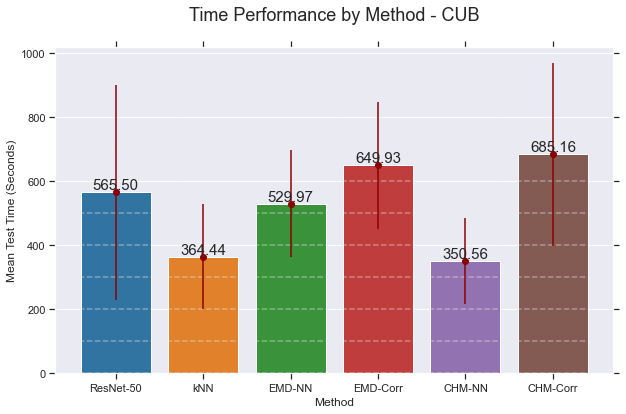

In [28]:
fig, ax = plt.subplots(1, figsize=(10, 6))

sns.barplot(data=raw_time_df, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f')
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title(f'Time Performance by Method - {DATA_SET}\n', fontsize=18)
plt.errorbar(raw_time_df['Method'], raw_time_df['mean'], yerr=raw_time_df['std'], fmt="o", color="darkred")
plt.ylabel('Mean Test Time (Seconds)')
plt.show()

In [29]:
all_raw_time_df = df.groupby(['Method'])['Test Reaction Time'].agg(lambda x: list(x/1000/30)).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [30]:
all_raw_time_df

,Method,Test Reaction Time
4,ResNet-50,"[13.700733333333334, 12.704533333333334, 12.70..."
5,kNN,"[10.442666666666666, 10.442666666666666, 10.44..."
3,EMD-NN,"[25.43, 25.43, 25.43, 25.43, 25.43, 25.43, 25...."
2,EMD-Corr,"[42.50926666666667, 24.2303, 24.2303, 24.2303,..."
1,CHM-NN,"[9.8134, 9.8134, 9.8134, 9.8134, 9.8134, 9.813..."
0,CHM-Corr,"[15.468633333333335, 16.133566666666667, 16.13..."


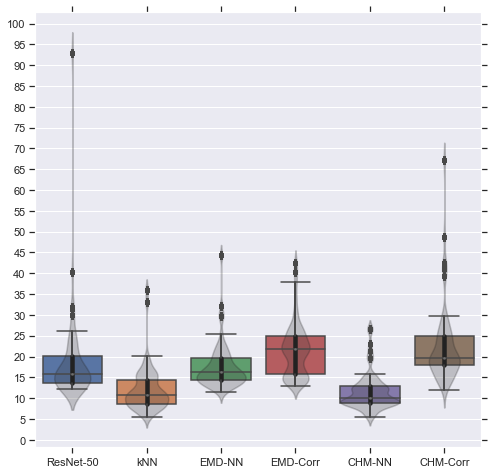

In [31]:
fig, ax = plt.subplots(1, figsize=(8, 8), facecolor=(1,1,1))
sns.violinplot(data=[all_raw_time_df['Test Reaction Time'][x] for x in [4,5,3,2,1,0]], ax=ax, color=".22",)
sns.boxplot(data=[all_raw_time_df['Test Reaction Time'][x] for x in [4,5,3,2,1,0]], ax=ax)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

ax.set_xticklabels([x for x in ORDER_DICT.keys()])
# plt.title(f'Time Performance - {DATA_SET} - (Seconds)', fontsize=16, pad=20)
plt.setp(ax.collections, alpha=.25)

ax.set_yticks(range(0, 105, 5))
plt.savefig(f'../plots/human-study-main-results/CUB-Time-Performance.pdf', dpi=100, bbox_inches='tight')
plt.show()

# Accuracy Breakdown

## Difficulty Level

In [32]:
df_difflevel = df.groupby(['UID', 'Method', 'DifficultyLevel', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index()
df_difflevel['mean'] = df_difflevel['mean']*100

In [33]:
df_difflevel.head()

,UID,Method,DifficultyLevel,ClassifierCorrectness,count,sum,mean
0,542bdb6dfdf99b324ea37c3aCHM-Corrs,CHM-Corr,Easy,0,5.0,3.0,60.0
1,542bdb6dfdf99b324ea37c3aCHM-Corrs,CHM-Corr,Easy,1,7.0,7.0,100.0
2,542bdb6dfdf99b324ea37c3aCHM-Corrs,CHM-Corr,Medium,0,10.0,4.0,40.0
3,542bdb6dfdf99b324ea37c3aCHM-Corrs,CHM-Corr,Medium,1,8.0,7.0,87.5
4,55057a56fdf99b5b566a70bbCHM-Corrs,CHM-Corr,Easy,0,3.0,3.0,100.0


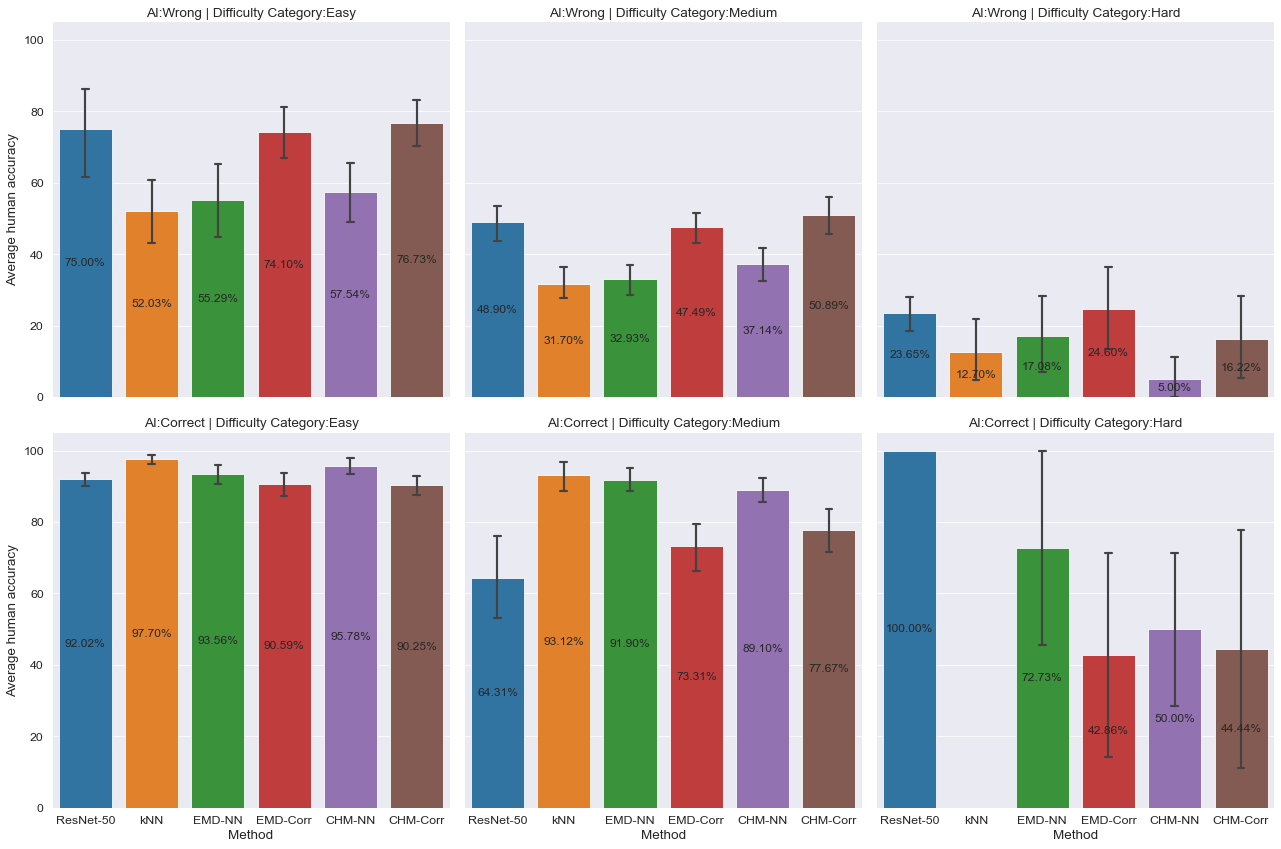

In [34]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_difflevel, col="DifficultyLevel", row="ClassifierCorrectness", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10", capsize=.1)

  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, fmt='%.2f%%', label_type='center')

  plt.ylim(0, 105)
  
  axes = g.axes.flatten()
  for ci, C in enumerate(['Wrong', 'Correct']):
    for di, D in enumerate(['Easy', 'Medium', 'Hard']):
      axes[(ci*3)+di].set_title(f"AI:{C} | Difficulty Category:{D}")

  plt.savefig(f'../plots/human-study-main-results/CUB-Difficulty-vs-AICorrectNess.pdf', dpi=100, bbox_inches='tight')
  axes[0].set_ylabel('Average human accuracy')
  axes[3].set_ylabel('Average human accuracy')
  plt.show()

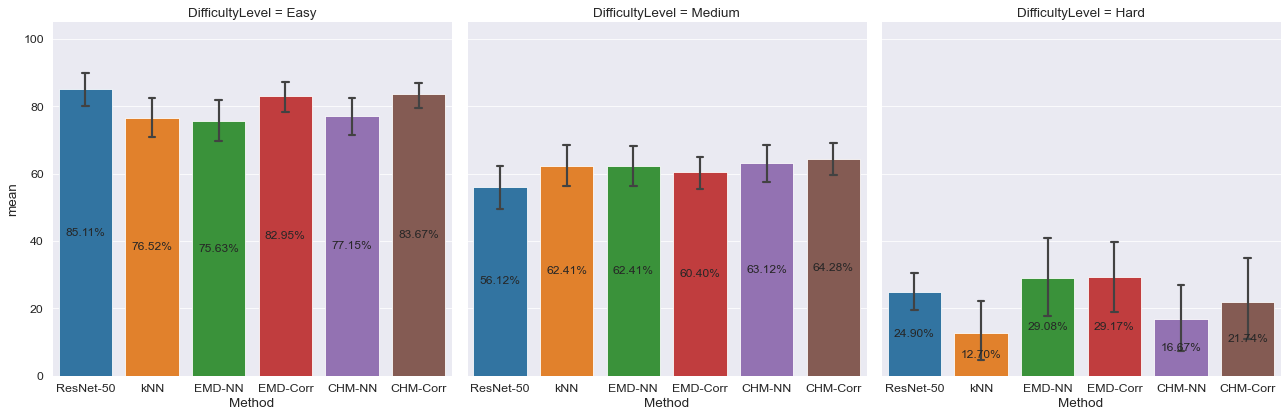

In [35]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_difflevel, col="DifficultyLevel", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10", capsize=.1)

  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, fmt='%.2f%%', label_type='center')

  plt.ylim(0, 105)
  
  axes = g.axes.flatten()
  plt.savefig(f'../plots/human-study-main-results/CUB-Difficulty-Only.pdf', dpi=100, bbox_inches='tight')
  plt.show()

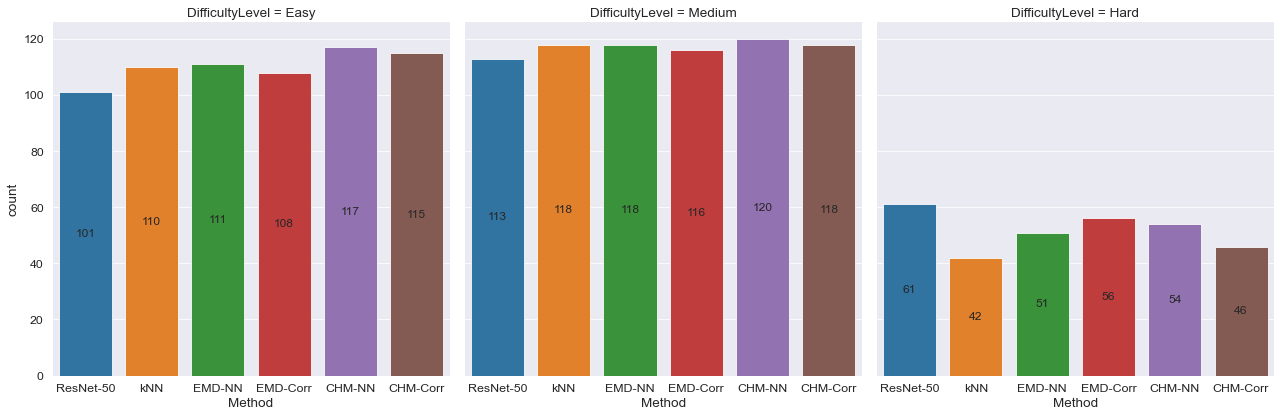

In [36]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_difflevel, col="DifficultyLevel", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.countplot, "Method", order=df.Method.unique(), palette="tab10", capsize=.1)

  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='center')

  plt.show()

In [37]:
df_correctness = df.groupby(['UID', 'Method', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index()
df_correctness['mean'] *=100

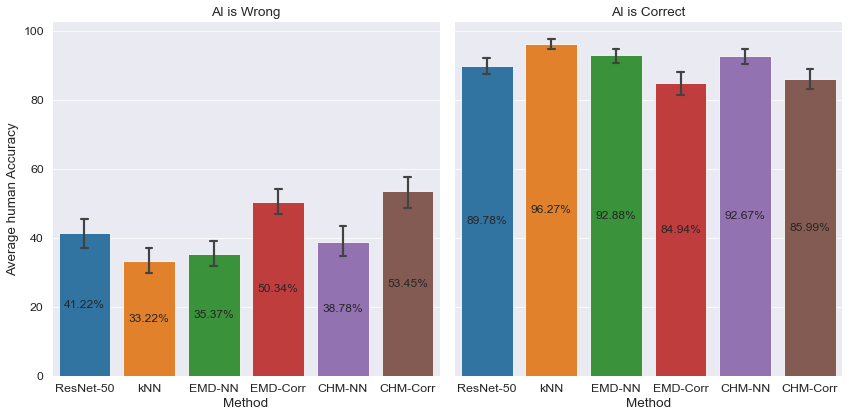

In [38]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_correctness, col="ClassifierCorrectness", height=6)
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10", capsize=.1)
  
  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='center', fmt='%.2f%%')

  axes = g.axes.flatten()
  axes[0].set_ylabel('Average human Accuracy')
  
  axes[0].set_title('AI is Wrong')
  axes[1].set_title('AI is Correct')
  
  plt.savefig(f'../plots/human-study-main-results/CUB-AICorrectNess-Performance.pdf', dpi=100, bbox_inches='tight')
  plt.show()

In [39]:
df_diff_count = df.groupby(['Method', 'ClassifierCorrectness', 'DifficultyLevel'])['UID'].count().reset_index()

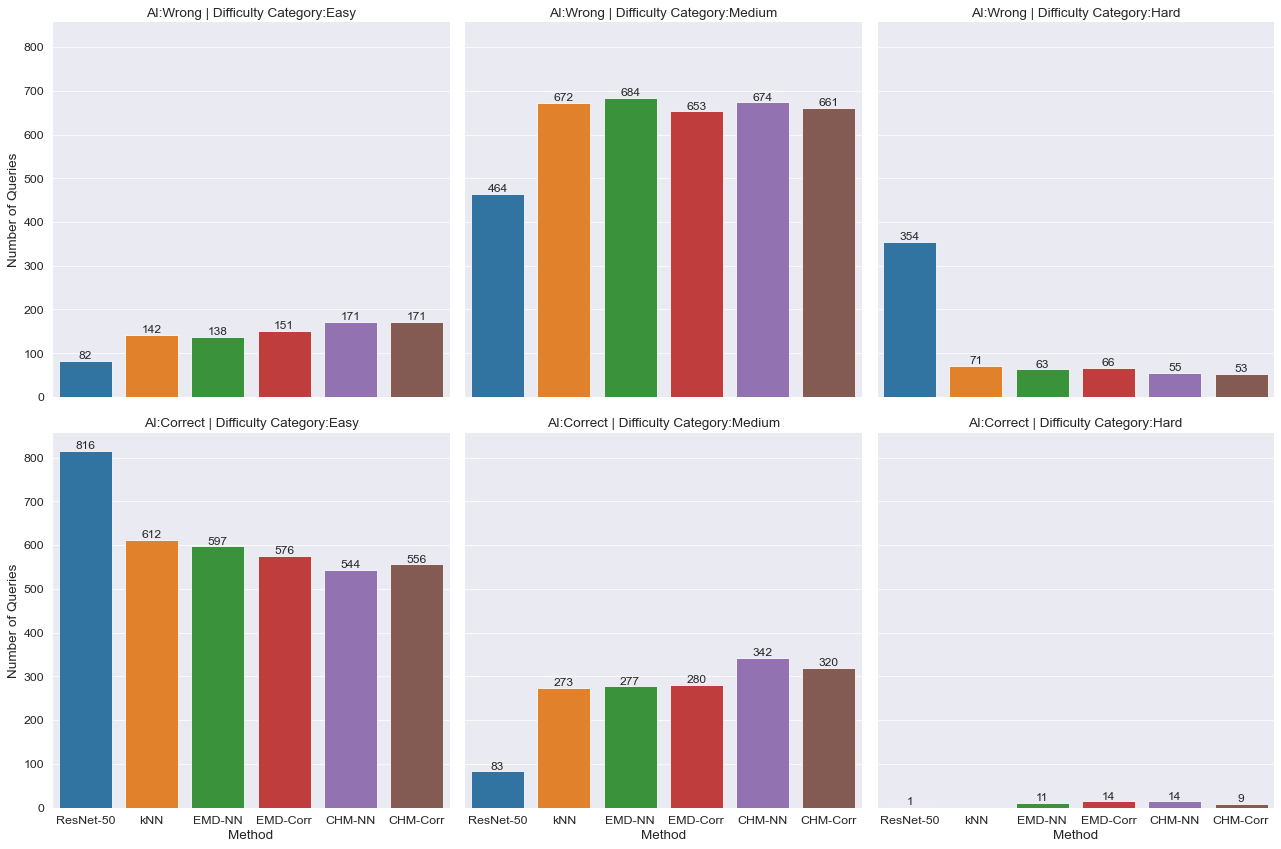

In [40]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_diff_count, col="DifficultyLevel", row="ClassifierCorrectness", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "UID", order=df.Method.unique(), palette="tab10", capsize=.1)
  
  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='edge')

  axes = g.axes.flatten()
  for ci, C in enumerate(['Wrong', 'Correct']):
    for di, D in enumerate(['Easy', 'Medium', 'Hard']):
      axes[(ci*3)+di].set_title(f"AI:{C} | Difficulty Category:{D}")
      
  axes[0].set_ylabel('Number of Queries')
  axes[3].set_ylabel('Number of Queries')
  plt.savefig(f'../plots/human-study-main-results/CUB-Difficulty-vs-AICorrectNess-Counts.pdf', dpi=100, bbox_inches='tight')
  plt.show()

# Statistical Significance

In [41]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [42]:
data_for_analysis = df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index()
data_for_analysis = data_for_analysis.groupby('Method')['Correctness'].agg(lambda x: list(x)).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [43]:
data_for_analysis

,Method,Correctness
4,ResNet-50,"[0.6666666666666666, 0.6, 0.5666666666666667, ..."
5,kNN,"[0.6333333333333333, 0.5333333333333333, 0.566..."
3,EMD-NN,"[0.7, 0.6333333333333333, 0.5666666666666667, ..."
2,EMD-Corr,"[0.6, 0.8, 0.5666666666666667, 0.7666666666666..."
1,CHM-NN,"[0.7666666666666667, 0.8333333333333334, 0.633..."
0,CHM-Corr,"[0.7, 0.8333333333333334, 0.8, 0.6, 0.66666666..."


In [44]:
data_for_analysis_dict = {}
for i, row in data_for_analysis.iterrows():
  data_for_analysis_dict[row['Method']] = row['Correctness']

In [45]:
data_for_analysis_dict.keys()

dict_keys(['ResNet-50', 'kNN', 'EMD-NN', 'EMD-Corr', 'CHM-NN', 'CHM-Corr'])

In [46]:
pairs = [( 'ResNet-50', 'kNN'),
          ('ResNet-50', 'EMD-NN'),
          ('ResNet-50', 'EMD-Corr'),
          ('ResNet-50', 'CHM-NN'),
          ('ResNet-50', 'CHM-Corr'),
          ('kNN', 'EMD-NN'),
          ('kNN', 'EMD-Corr'),
          ('kNN', 'CHM-NN'),
          ('kNN', 'CHM-Corr'),
          ('EMD-NN', 'EMD-Corr'),
          ('EMD-NN', 'CHM-NN'),
          ('EMD-NN', 'CHM-Corr'),
          ('EMD-Corr', 'CHM-NN'),
          ('EMD-Corr', 'CHM-Corr'),
          ('CHM-NN', 'CHM-Corr')]

pvalues = [
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['kNN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['EMD-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['EMD-Corr'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['EMD-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['EMD-Corr'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['EMD-NN'], data_for_analysis_dict['EMD-Corr'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['EMD-NN'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['EMD-NN'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['EMD-Corr'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['EMD-Corr'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['CHM-NN'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
]

formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

In [47]:
selected_pairs = []
selected_pvalues = []
selected_pvalues_f = []

for pv, pi, fpv in  zip(pvalues, pairs, formatted_pvalues):
  if pv <= 0.05:
    selected_pairs.append(pi)
    selected_pvalues.append(pv)
    selected_pvalues_f.append(fpv)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

EMD-NN vs. EMD-Corr: Mann-Whitney-Wilcoxon test two-sided, P_val:1.291e-02 U_stat=1.258e+03
CHM-NN vs. CHM-Corr: Mann-Whitney-Wilcoxon test two-sided, P_val:9.320e-03 U_stat=1.284e+03
kNN vs. EMD-Corr: Mann-Whitney-Wilcoxon test two-sided, P_val:4.303e-02 U_stat=1.343e+03
EMD-NN vs. CHM-Corr: Mann-Whitney-Wilcoxon test two-sided, P_val:7.034e-04 U_stat=1.115e+03
kNN vs. CHM-Corr: Mann-Whitney-Wilcoxon test two-sided, P_val:2.170e-03 U_stat=1.175e+03
ResNet-50 vs. CHM-Corr: Mann-Whitney-Wilcoxon test two-sided, P_val:1.217e-02 U_stat=1.301e+03


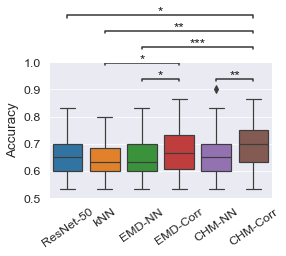

In [48]:
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)

plotting_parameters = {
    'data':    df.groupby(['UID', 'Method'])['Accuracy'].mean().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT)),
    'x':       'Method',
    'y':       'Accuracy',
    'palette': 'tab10'
}

with sns.plotting_context('paper', font_scale = 1.4):
  # Create new plot
  fig, ax = plt.subplots(1, figsize=(4, 2.5), facecolor=(1,1,1))

  # Plot with seabornz
  sns.boxplot(**plotting_parameters)

  # Add annotations
  annotator = Annotator(ax, selected_pairs, **plotting_parameters)
  annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', text_offset=-3.5)
  annotator.set_custom_annotations(selected_pvalues_f)
  annotator.apply_and_annotate()
  
  # Label and show
  ax.set_ylabel("Accuracy")
  ax.set_xlabel("")
  plt.yticks(np.arange(0.5, 1.01, 0.1))
  plt.setp( ax.xaxis.get_majorticklabels(), rotation=35 ) 
  fig.savefig(f'../plots/human-study-main-results/CUB-StatisticalDetails-Slim.pdf', dpi=100, bbox_inches='tight')
  plt.show()

### Final Users 

In [49]:
df.groupby(['UID', 'Method'])['Correctness'].agg(['mean']).groupby(['Method']).agg(['count', 'mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT)).reset_index(drop=True)

Method  mean                    
             count      mean       std
0  ResNet-50    60  0.655000  0.074618
1        kNN    59  0.647458  0.071439
2     EMD-NN    59  0.641243  0.070667
3   EMD-Corr    58  0.676437  0.074407
4     CHM-NN    60  0.657222  0.081440
5   CHM-Corr    59  0.697175  0.090822

# Accepts Rejects

In [50]:
df.head()

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1206,5cb329855ee1730001ae6683No-XAI,American_Redstart_0044_103433.jpg,15,382592.0,381136,2022-05-06 01:09:16.104,1,0.533333,16,ResNet-50,109.American_Redstart,0,0.49,Medium,156.White_eyed_Vireo,152.Blue_headed_Vireo,152.Blue_headed_Vireo,152.Blue_headed_Vireo,0.49,0.0275,0.0225,0.0225
1205,5cb329855ee1730001ae6683No-XAI,Lazuli_Bunting_0076_14662.jpg,15,382592.0,381136,2022-05-06 01:09:16.104,1,0.533333,16,ResNet-50,015.Lazuli_Bunting,1,0.99,Easy,015.Lazuli_Bunting,015.Lazuli_Bunting,015.Lazuli_Bunting,015.Lazuli_Bunting,0.99,0.0475,0.0400,0.0425
1204,5cb329855ee1730001ae6683No-XAI,American_Crow_0048_25062.jpg,15,382592.0,381136,2022-05-06 01:09:16.104,0,0.533333,16,ResNet-50,029.American_Crow,0,0.47,Medium,107.Common_Raven,107.Common_Raven,107.Common_Raven,029.American_Crow,0.47,0.0250,0.0250,0.0225
1203,5cb329855ee1730001ae6683No-XAI,Bronzed_Cowbird_0022_796221.jpg,15,382592.0,381136,2022-05-06 01:09:16.104,1,0.533333,16,ResNet-50,026.Bronzed_Cowbird,1,0.99,Easy,026.Bronzed_Cowbird,026.Bronzed_Cowbird,026.Bronzed_Cowbird,026.Bronzed_Cowbird,0.99,0.0475,0.0500,0.0325


In [51]:
Accept_Reject = []
Accepts = []
Rejects = []

for i, j in df[['Correctness', 'ClassifierCorrectness']].values:
  if i == 1 and j == 1:
    Accept_Reject.append('Accept')
    Accepts.append(1)
    Rejects.append(0)
  elif i == 0 and j == 1:
    Accept_Reject.append('Reject')
    Accepts.append(0)
    Rejects.append(1)
  elif i == 1 and j == 0:
    Accept_Reject.append('Reject')
    Accepts.append(0)
    Rejects.append(1)
  elif i == 0 and j == 0: 
    Accept_Reject.append('Accept')
    Accepts.append(1)
    Rejects.append(0)
  else:
    raise

In [52]:
df['AcceptReject'] = Accept_Reject
df['Accepted']     = Accepts
df['Rejected'] = Rejects

In [53]:
df.groupby(['Method'])[['Accepted' , 'Rejected']].sum().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,Accepted,Rejected
4,ResNet-50,1337,463
5,kNN,1443,327
3,EMD-NN,1394,376
2,EMD-Corr,1171,569
1,CHM-NN,1385,415
0,CHM-Corr,1173,597


In [54]:
df.groupby(['Method', 'DifficultyLevel'])[['Accepted' , 'Rejected']].sum().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,DifficultyLevel,Accepted,Rejected
14,ResNet-50,Medium,296,251
13,ResNet-50,Hard,270,85
12,ResNet-50,Easy,771,127
17,kNN,Medium,712,233
15,kNN,Easy,668,86
16,kNN,Hard,63,8
11,EMD-NN,Medium,710,251
10,EMD-NN,Hard,61,13
9,EMD-NN,Easy,623,112
8,EMD-Corr,Medium,553,380


In [55]:
df = df.sort_index()

In [56]:
accuracy_df = df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df['mean']*=100
accuracy_df['std']*=100
accuracy_df

,Method,mean,std
4,ResNet-50,65.500000,7.461767
5,kNN,64.745763,7.143933
3,EMD-NN,64.124294,7.066704
2,EMD-Corr,67.643678,7.440698
1,CHM-NN,65.722222,8.143988
0,CHM-Corr,69.717514,9.082174


In [57]:
df2 = df.groupby(['UID', 'Method']).nth[0:15]
df3 = df.groupby(['UID', 'Method']).nth[15:]

accuracy_df2 = df2.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df2['mean']*=100
accuracy_df2['std']*=100

accuracy_df3 = df3.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df3['mean']*=100
accuracy_df3['std']*=100

In [58]:
accuracy_df2

,Method,mean,std
4,ResNet-50,64.444444,11.227265
5,kNN,63.728814,10.811601
3,EMD-NN,63.389831,12.402749
2,EMD-Corr,68.160920,9.264837
1,CHM-NN,63.666667,10.300568
0,CHM-Corr,69.152542,11.339302


In [59]:
accuracy_df3

,Method,mean,std
4,ResNet-50,66.555556,8.001098
5,kNN,65.762712,10.317387
3,EMD-NN,64.858757,10.195823
2,EMD-Corr,67.126437,10.876738
1,CHM-NN,67.777778,12.467157
0,CHM-Corr,70.282486,13.351828


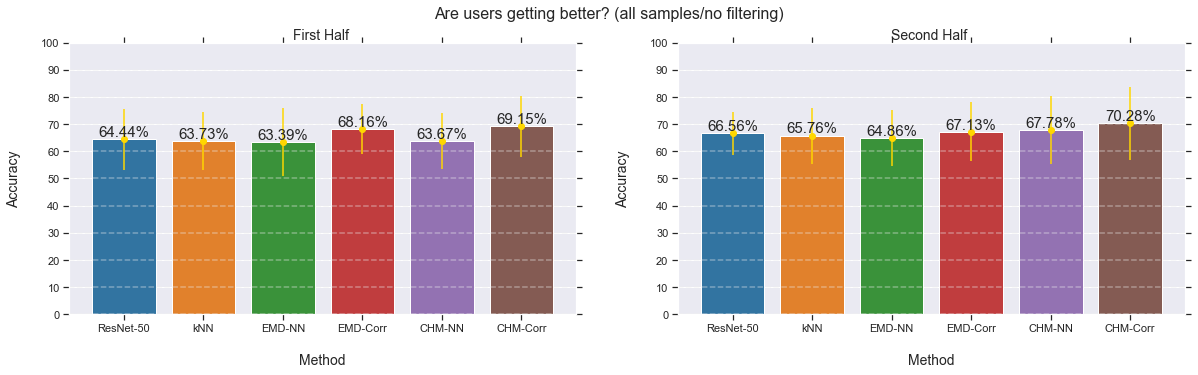

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

ax=axes[0]

sns.barplot(data=accuracy_df2, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_title(f'First Half ', fontsize=14, pad=-50)

ax.errorbar(accuracy_df2['Method'], accuracy_df2['mean'], yerr=accuracy_df2['std'], fmt="o", color="gold")

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)


ax=axes[1]

sns.barplot(data=accuracy_df3, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_title(f'Second Half ', fontsize=14, pad=-50)

ax.errorbar(accuracy_df3['Method'], accuracy_df3['mean'], yerr=accuracy_df3['std'], fmt="o", color="gold")

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)

fig.suptitle('Are users getting better? (all samples/no filtering)', va='top', fontsize=16)

plt.show()

In [61]:
import matplotlib

In [62]:
def grouped_barplot(df, cat, subcat, val , err, title):
    fig, ax = plt.subplots(1, figsize=(16, 5))

    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    
    bars = []
    for i, gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        tmpbar = ax.bar(x+offsets[i], dfg[val].values, width=width/1.2, label="{} {}".format(subcat, gr), yerr=dfg[err].values)
        for container in ax.containers:
          if type(container) is matplotlib.container.BarContainer:
            ax.bar_label(container, fontsize=13.5, fmt='%.2f%%', label_type='edge')

        
    ax.set_ylim(0, 100)
    ax.set_yticks(range(0, 101, 10))
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = ax.get_yticks()
    for tick in vals:
      ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      
      
    ax.set_xlabel('Method', labelpad=20, fontsize=14)
    ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)
    plt.xticks(x, u)
    plt.legend(loc='lower right')
    plt.title(title, fontsize=18, pad=20)
    plt.show()


In [63]:
dfc = pd.concat([accuracy_df2, accuracy_df3])
dfc['Split'] = ['First Half']*6+['Second Half']*6

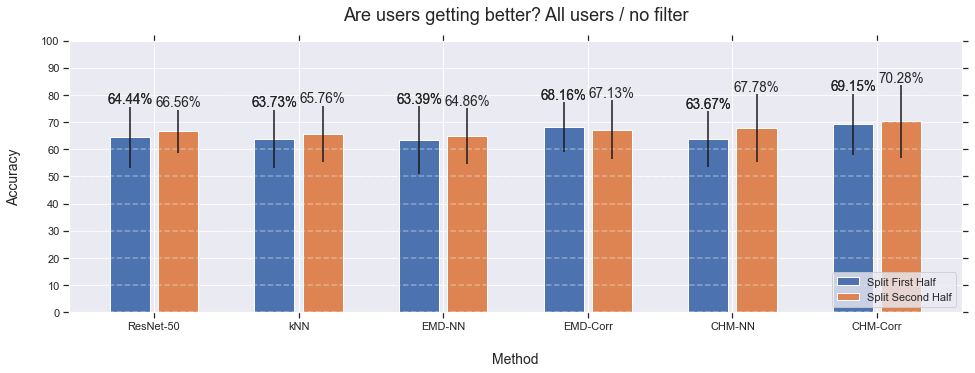

In [64]:
grouped_barplot(dfc, 'Method', 'Split', 'mean' , 'std', 'Are users getting better? All users / no filter')

### Now Let's remove unbalance sets

In [65]:
df2 = df.groupby(['UID', 'Method']).nth[0:15]
df3 = df.groupby(['UID', 'Method']).nth[15:]

accuracy_df2 = df2.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df2['mean']*=100
accuracy_df2['std']*=100

accuracy_df3 = df3.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df3['mean']*=100
accuracy_df3['std']*=100

In [66]:
df2tmp = df2.reset_index().groupby(['UID'])['ClassifierCorrectness'].mean().reset_index()
valid_UIDs = df2tmp[(df2tmp['ClassifierCorrectness']<=0.6) & (df2tmp['ClassifierCorrectness']>=0.4)].UID

In [67]:
accuracy_df2v = df2.reset_index()[df2.reset_index().UID.isin(valid_UIDs)].groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df2v['mean']*=100
accuracy_df2v['std']*=100

accuracy_df3v = df3.reset_index()[df3.reset_index().UID.isin(valid_UIDs)].groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df3v['mean']*=100
accuracy_df3v['std']*=100

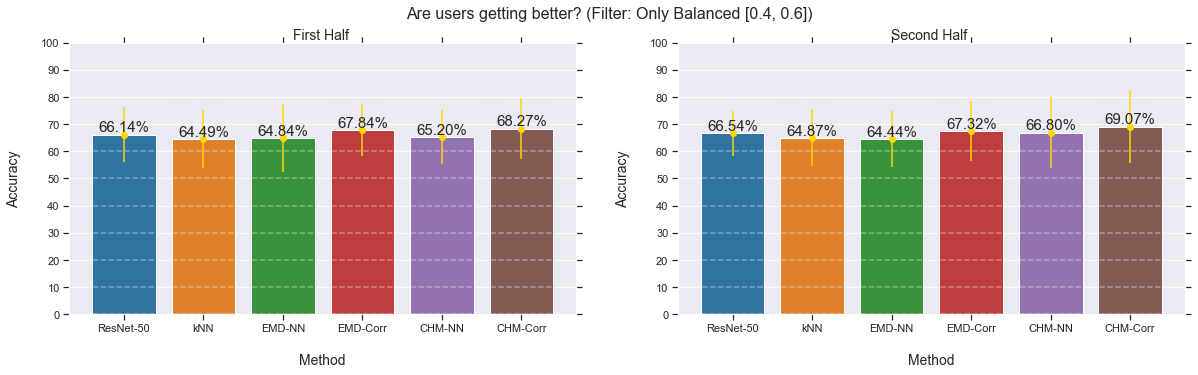

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

ax=axes[0]

sns.barplot(data=accuracy_df2v, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_title(f'First Half ', fontsize=14, pad=-50)

ax.errorbar(accuracy_df2v['Method'], accuracy_df2v['mean'], yerr=accuracy_df2v['std'], fmt="o", color="gold")

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)


ax=axes[1]

sns.barplot(data=accuracy_df3v, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_title(f'Second Half ', fontsize=14, pad=-50)

ax.errorbar(accuracy_df3v['Method'], accuracy_df3v['mean'], yerr=accuracy_df3v['std'], fmt="o", color="gold")

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)

fig.suptitle('Are users getting better? (Filter: Only Balanced [0.4, 0.6])', va='top', fontsize=16)

plt.show()

In [69]:
dfc = pd.concat([accuracy_df2v, accuracy_df3v])

In [70]:
dfc['Split'] = ['First Half']*6+['Second Half']*6

In [71]:
# fig, ax = plt.subplots(1, figsize=(16, 5))
# sns.barplot(data=dfc, x='Method', y='mean', estimator=np.median,ci =0.2, ax=ax, hue='Split', palette="tab10")

# for container in ax.containers:
#   ax.bar_label(container, fontsize=15, fmt='%.2f%%')

# ax.set_ylim(0, 100)
# ax.set_yticks(range(0, 101, 10))
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# # Draw horizontal axis lines
# vals = ax.get_yticks()
# for tick in vals:
#   ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# ax.set_title(f'Second Half ', fontsize=14, pad=-50)

# ax.set_xlabel('Method', labelpad=20, fontsize=14)
# ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)

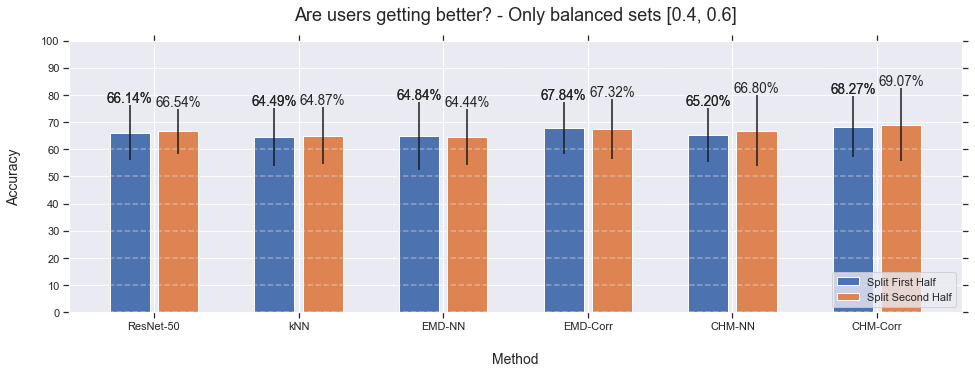

In [72]:
grouped_barplot(dfc, 'Method', 'Split', 'mean' , 'std', 'Are users getting better? - Only balanced sets [0.4, 0.6]')

In [73]:
df2 = df.groupby(['UID', 'Method']).nth[0:15]
df3 = df.groupby(['UID', 'Method']).nth[15:]


accuracy_df2 = df2.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df2['mean']*=100
accuracy_df2['std']*=100

accuracy_df3 = df3.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df3['mean']*=100
accuracy_df3['std']*=100


accuracy_df2n = df2.reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df2n['mean']*=100
accuracy_df2n['std']*=100

accuracy_df3n = df3.reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df3n['mean']*=100
accuracy_df3n['std']*=100

In [74]:
df2.reset_index().groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,mean,std
4,ResNet-50,0.644444,0.112273
5,kNN,0.637288,0.108116
3,EMD-NN,0.633898,0.124027
2,EMD-Corr,0.681609,0.092648
1,CHM-NN,0.636667,0.103006
0,CHM-Corr,0.691525,0.113393


In [75]:
df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method']).mean().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,Correctness
4,ResNet-50,0.655000
5,kNN,0.647458
3,EMD-NN,0.641243
2,EMD-Corr,0.676437
1,CHM-NN,0.657222
0,CHM-Corr,0.697175


In [76]:
df.groupby(['UID'])['Correctness', 'Method'].agg({'Correctness':'mean', 'Method':'first'}).reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

/tmp/ipykernel_2122540/3666775599.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['UID'])['Correctness', 'Method'].agg({'Correctness':'mean', 'Method':'first'}).reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))


,Method,mean,std
4,ResNet-50,0.655000,0.074618
5,kNN,0.647458,0.071439
3,EMD-NN,0.641243,0.070667
2,EMD-Corr,0.676437,0.074407
1,CHM-NN,0.657222,0.081440
0,CHM-Corr,0.697175,0.090822


In [77]:
df.groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,mean,std
4,ResNet-50,0.655000,0.475500
5,kNN,0.647458,0.477897
3,EMD-NN,0.641243,0.479771
2,EMD-Corr,0.676437,0.467970
1,CHM-NN,0.657222,0.474770
0,CHM-Corr,0.697175,0.459610


In [78]:
df2.reset_index().groupby(['Method'])['Correctness'].mean()

Method
CHM-Corr     0.691525
CHM-NN       0.636667
EMD-Corr     0.681609
EMD-NN       0.633898
ResNet-50    0.644444
kNN          0.637288
Name: Correctness, dtype: float64

In [79]:
accuracy_df2n

,Method,mean,std
4,ResNet-50,64.444444,47.894747
5,kNN,63.728814,48.105452
3,EMD-NN,63.389831,48.201013
2,EMD-Corr,68.160920,46.611998
1,CHM-NN,63.666667,48.122711
0,CHM-Corr,69.152542,46.212479


In [80]:
accuracy_df3n

,Method,mean,std
4,ResNet-50,66.555556,47.205821
5,kNN,65.762712,47.477193
3,EMD-NN,64.858757,47.768145
2,EMD-Corr,67.126437,47.002388
1,CHM-NN,67.777778,46.758742
0,CHM-Corr,70.282486,45.727273


In [81]:
df2.reset_index().groupby(['UID'])['Correctness', 'Method'].agg({'Correctness':'mean', 'Method':'first'}).reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

/tmp/ipykernel_2122540/3577383966.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.reset_index().groupby(['UID'])['Correctness', 'Method'].agg({'Correctness':'mean', 'Method':'first'}).reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))


,Method,mean,std
4,ResNet-50,0.644444,0.112273
5,kNN,0.637288,0.108116
3,EMD-NN,0.633898,0.124027
2,EMD-Corr,0.681609,0.092648
1,CHM-NN,0.636667,0.103006
0,CHM-Corr,0.691525,0.113393


In [82]:
df3.reset_index().groupby(['UID'])['Correctness', 'Method'].agg({'Correctness':'mean', 'Method':'first'}).reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

/tmp/ipykernel_2122540/1788586960.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.reset_index().groupby(['UID'])['Correctness', 'Method'].agg({'Correctness':'mean', 'Method':'first'}).reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))


,Method,mean,std
4,ResNet-50,0.665556,0.080011
5,kNN,0.657627,0.103174
3,EMD-NN,0.648588,0.101958
2,EMD-Corr,0.671264,0.108767
1,CHM-NN,0.677778,0.124672
0,CHM-Corr,0.702825,0.133518


In [83]:
np.mean(df3.reset_index()[df3.reset_index().Method=='EMD-NN']['Correctness'])

0.6485875706214689

In [84]:
# df3.reset_index()

In [85]:
np.mean(df[df.Method=='ResNet-50']['Correctness'])

0.655

In [86]:
np.mean(df[df.Method=='kNN']['Correctness'])

0.6474576271186441

In [87]:
accuracy_df

,Method,mean,std
4,ResNet-50,65.500000,7.461767
5,kNN,64.745763,7.143933
3,EMD-NN,64.124294,7.066704
2,EMD-Corr,67.643678,7.440698
1,CHM-NN,65.722222,8.143988
0,CHM-Corr,69.717514,9.082174


In [88]:
df2.reset_index().groupby(['Method'])['Correctness'].mean()

Method
CHM-Corr     0.691525
CHM-NN       0.636667
EMD-Corr     0.681609
EMD-NN       0.633898
ResNet-50    0.644444
kNN          0.637288
Name: Correctness, dtype: float64

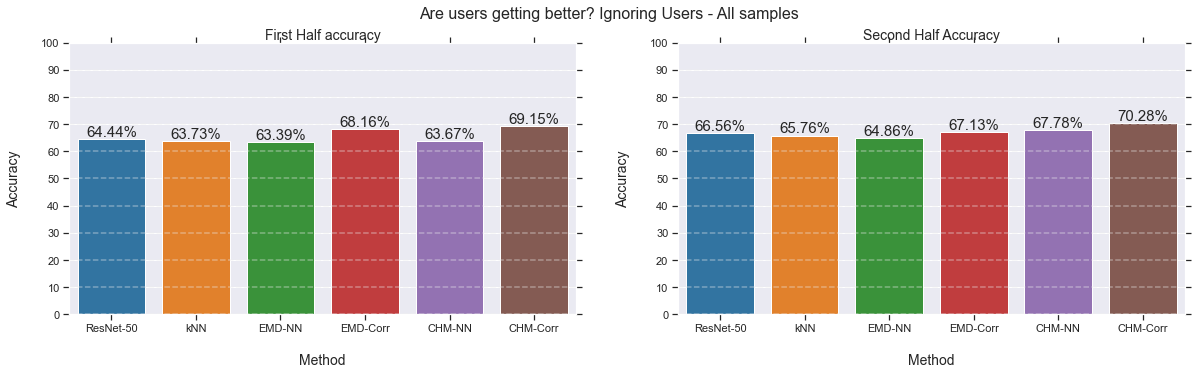

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

ax=axes[0]

sns.barplot(data=accuracy_df2, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_title(f'First Half accuracy', fontsize=14, pad=-50)

# ax.errorbar(accuracy_df2['Method'], accuracy_df2['mean'], yerr=accuracy_df2['std'], fmt="o", color="gold")

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)


ax=axes[1]

sns.barplot(data=accuracy_df3, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_title(f'Second Half Accuracy', fontsize=14, pad=-50)

# ax.errorbar(accuracy_df3['Method'], accuracy_df3['mean'], yerr=accuracy_df3['std'], fmt="o", color="gold")

ax.set_xlabel('Method', labelpad=20, fontsize=14)
ax.set_ylabel('Accuracy', labelpad=20, fontsize=14)

fig.suptitle('Are users getting better? Ignoring Users - All samples', va='top', fontsize=16)

plt.show()

In [90]:
xr = np.random.randint(0, 2, (10, 10))

In [91]:
np.mean(xr.mean(axis=0))

0.5800000000000001

In [92]:
np.mean(xr)

0.58